In [7]:
# coding: utf-8

from vqaTools.vqa import VQA
from vqaEvaluation.vqaEval import VQAEval

#from vgg16 import VGG16, preprocess_input
import random
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import os
import sys
import json
#sys.path.insert(0, '{}/PythonHelperTools/vqaTools'.format(dataDir))


In [8]:
dataDir		='Data'
versionType ='' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='abstract_v002'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0.
dataSubType ='train2015'
annFile     ='{0}/Annotations/{1}{2}_{3}_annotations.json'.format(dataDir, versionType, dataType, dataSubType)
quesFile    ='{0}/Questions/{2}_{1}{3}_{4}_questions.json'.format(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '{0}/Images/scene_img_{1}_{2}/'.format(dataDir, dataType, dataSubType)

In [9]:
# initialize VQA api for QA annotations
vqa = VQA(annFile, quesFile)

loading VQA annotations and questions into memory...
0:00:03.131892
creating index...
index created!


Question: How many chairs are seen?
Answer 1: 1
Answer 2: 1
Answer 3: 0
Answer 4: 1
Answer 5: 1
Answer 6: 1
Answer 7: 0
Answer 8: 1
Answer 9: 0
Answer 10: 1


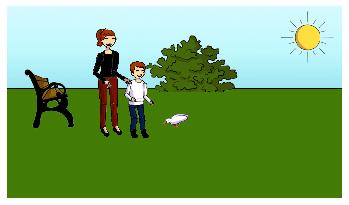

In [5]:
# load and display QA annotations for given question types
"""
All possible quesTypes for abstract and mscoco has been provided in respective text files in ../QuestionTypes/ folder.
"""
annIds = vqa.getQuesIds(quesTypes='how many');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()


Data/Images/scene_img_abstract_v002_train2015/abstract_v002_train2015_000000011604.png


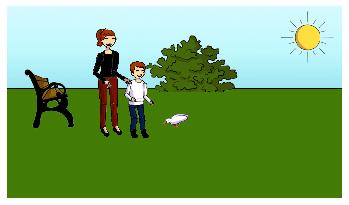

InvalidArgumentError: Input to reshape is a tensor with 129024 values, but the requested shape has 840000
	 [[{{node reshape_3/Reshape}}]]

In [13]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.utils.vis_utils import plot_model
from nn_model_tuning_constants import *
from data_related_constants import *
import numpy as np
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Flatten,merge
from keras.layers import Input, LSTM, Embedding
from keras.layers.core import Reshape, Activation, Dropout
from keras.layers.merge import *
from keras.models import Model, Sequential
from keras.preprocessing import image
import h5py

model1 = Sequential()

model1.add( VGG16(weights='imagenet', include_top=False))
model1.add(Reshape( image_feature_size, input_shape=image_feature_size))
model1.add(Dense(1024, input_dim=4096, activation='tanh'))

img_path =imgDir + imgFilename
print(img_path)
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()
img = image.load_img(img_path, target_size=(700,400))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model1.predict(x)

print(features)
print(model1.summary())
plot_model(model1, to_file='model_plotcnn.png', show_shapes=True, show_layer_names=True)

In [11]:

model = Sequential()
model.add(Embedding(2000, embedding_dim, input_length=seq_length, trainable=False))
model.add(LSTM(units=512, return_sequences=True, input_shape=(seq_length, embedding_dim)))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=512, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(1024, activation='tanh'))
print(model.summary())
plot_model(model, to_file='model_plotlstm.png', show_shapes=True, show_layer_names=True)
#####model = Model(2000, embedding_dim, seq_length, dropout_rate)

# combined model
print ("Merging final model...")
fc_model = Sequential()
#####fc_model.merge([model1, model], concat_axis = 1)
for _ in range(number_of_dense_layers):
    fc_model = Sequential()
    fc_model.add(Dense(number_of_hidden_units, kernel_initializer='uniform'))
    fc_model.add(Activation(activation_function))
    fc_model.add(Dropout(dropout_rate))

fc_model.add(Dense(10000, activation='softmax'))
fc_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(fc_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
I = io.imread('download.png')

#####encoded_image = vision_model(image_input)

# Next, let's define a language model to encode the question into a vector.
# Each question will be at most 100 word long,
# and we will index words as integers from 1 to 9999.
#####question_input = Input(shape=(100,), dtype='int32')
#####embedded_question = Embedding(input_dim=10000, output_dim=256, input_length=100)(question_input)
#####encoded_question = LSTM(256)(embedded_question)

# Let's concatenate the question vector and the image vector:
###merged = keras.layers.concatenate([encoded_question, encoded_image])

# And let's train a logistic regression over 1000 words on top:
###output = Dense(1000, activation='softmax')(merged)

# This is our final model:
####vqa_model = Model(inputs=[image_input, question_input], outputs=output)    


img_path =imgDir + imgFilename
img = image.load_img(img_path, target_size=(700,400,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model1.predict(x)
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()
print(features)
print(fc_model.summary())

plt.imshow(I)
plt.axis('off')
plt.show()


W0918 10:40:09.061106 13692 deprecation.py:506] From C:\Users\sabbir\Anaconda3\envs\myenv\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 300)           600000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 26, 512)           1665024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
Total params: 4,889,536
Trainable params: 4,289,536
Non-trainable params: 600,000
____________________________________________________________

W0918 10:40:10.055526 13692 deprecation_wrapper.py:119] From C:\Users\sabbir\Anaconda3\envs\myenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Merging final model...


FileNotFoundError: No such file: 'C:\Users\sabbir\Documents\VQA-MS\download.png'

In [11]:
from __future__ import print_function

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant


BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                with open(fpath, **args) as f:
                    t = f.read()
                    i = t.find('\n\n')  # skip header
                    if 0 < i:
                        t = t[i:]
                    texts.append(t)
                labels.append(label_id)

print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_val, y_val))

Indexing word vectors.


FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B\\glove.6B.100d.txt'

In [ ]:
# load and display QA annotations for given answer types
"""
ansTypes can be one of the following
yes/no
number
other
"""
annIds = vqa.getQuesIds(ansTypes='yes/no');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
    I = io.imread(imgDir + imgFilename)
    plt.imshow(I)
    plt.axis('off')
    plt.show()


In [ ]:
# load and display QA annotations for given images
"""
Usage: vqa.getImgIds(quesIds=[], quesTypes=[], ansTypes=[])
Above method can be used to retrieve imageIds for given question Ids or given question types or given answer types.
"""
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5));  
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)
vqa.showQA([randomAnn])  
imgId = randomAnn['image_id']
imgFilename = dataType + '_' + dataSubType + '_'+ str(imgId).zfill(12) + '.png'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

In [ ]:
# set up file names and paths
versionType ='' # this should be '' when using VQA v2.0 dataset
taskTypes    =['MultipleChoice','OpenEnded'] # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
taskType    = 'OpenEnded'
dataType    ='abstract_v002'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0. 
dataSubType ='val2015'
annFile     ='{0}/Annotations/{1}{2}_{3}_annotations.json'.format(dataDir, versionType, dataType, dataSubType)
quesFile    ='{0}/Questions/{2}_{1}{3}_{4}_questions.json'.format(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '{0}/Images/scene_img_{1}_{2}/'.format(dataDir, dataType, dataSubType)
resultType  ='try0'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType'] 

# An example result json file has been provided in './Results' folder.  

[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['{}/Results/{}{}_{}_{}_{}_{}.json'.format(dataDir, versionType, taskType, dataType, dataSubType, \
resultType, fileType) for fileType in fileTypes ]  

print(resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile)
# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

In [ ]:
# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
VQAEval.evaluate(vqaEval) 

# print accuracies
print ("\n")
print ("Overall Accuracy is: {:.2f}\n".format(vqaEval.accuracy['overall']))
print ("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print ("{} : {:.2f}".format(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print ("\n")
print ("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
        print ("{} : {:.2f}".format(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print ("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   #35 is per question percentage accuracy
if len(evals) > 0:
	print ('ground truth answers')
	randomEval = random.choice(evals)
	randomAnn = vqa.loadQA(randomEval)
	vqa.showQA(randomAnn)

	print ('\n')
	print ('generated answer (accuracy {:.2f})'.format(vqaEval.evalQA[randomEval]))
	ann = vqaRes.loadQA(randomEval)[0]
	print ("Answer:   {}\n" .format(ann['answer']))

	imgId = randomAnn[0]['image_id']
	imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
	if os.path.isfile(imgDir + imgFilename):
		I = io.imread(imgDir + imgFilename)
		plt.imshow(I)
		plt.axis('off')
		plt.show()

# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))
